Load the diabetes dataset

In [1]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data, data.target

print(X.shape)

(442, 10)


Compute the cross-validation score with the default hyper-parameters

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

for Model in [Lasso, Ridge]:
    model = Model()
    print('%s: %s' % (Model.__name__, 
                      cross_val_score(model, X, y, cv=5).mean()))

Lasso: 0.33755978342749465
Ridge: 0.4101758336587286


We compute the cross-validation score as a function of alpha, the strength of the regularization for Lasso and Ridge

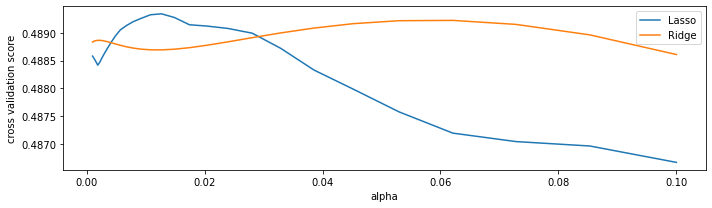

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

alphas = np.logspace(-3, -1, 30)
plt.figure(figsize=(10, 3))

for Model in [Lasso, Ridge]: 
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend()
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

__Using YellowBrick__

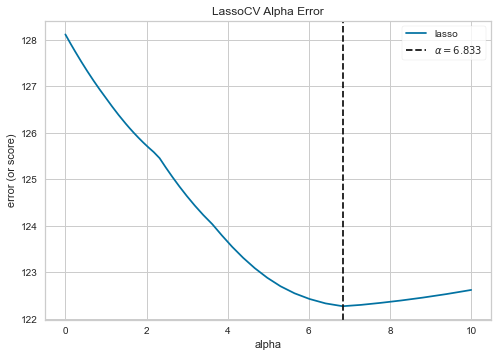

In [4]:
import numpy as np

from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
from yellowbrick.datasets import load_concrete

# Load the regression dataset
X, y = load_concrete()

# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas, cv=5)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show()

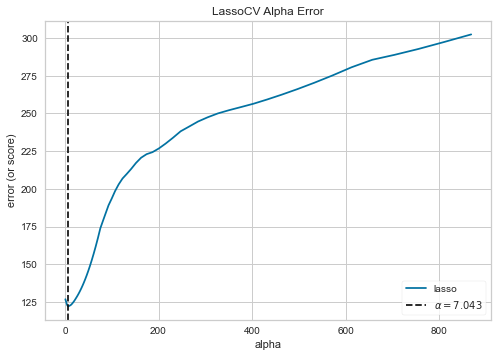

AlphaSelection(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001534AF02668>,
               is_fitted='auto', model=None)

In [5]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor.alphas import alphas
from yellowbrick.datasets import load_concrete

# Load dataset
X, y = load_concrete()

# Use the quick method and immediately show the figure
alphas(LassoCV(random_state=0, cv=5), X, y)